
<p align="center">
  <img src="https://storage.googleapis.com/kaggle-datasets-images/2243/3791/9384af51de8baa77f6320901f53bd26b/dataset-cover.png" />
  Image source: https://www.kaggle.com/
</p>

## Stage 1: Installing dependencies and setting up GPU environment

In [2]:
!pip install tensorflow
!pip install tensorflow-gpu==2.0.0

     |████████████████████████████████| 380.8 MB 41 kB/s 
     |████████████████████████████████| 50 kB 8.4 MB/s 
     |████████████████████████████████| 3.8 MB 68.6 MB/s 
     |████████████████████████████████| 449 kB 62.0 MB/s 
  Created wheel for gast: filename=gast-0.2.2-py3-none-any.whl size=7554 sha256=3af7e96cb63dc3da9799bbb4d623b3001705b128fa515801dae7e4fdf347d47d
  Stored in directory: /root/.cache/pip/wheels/21/7f/02/420f32a803f7d0967b48dd823da3f558c5166991bfd204eef3
Successfully built gast
  Attempting uninstall: tensorflow-estimator
    Found existing installation: tensorflow-estimator 2.8.0
    Uninstalling tensorflow-estimator-2.8.0:
      Successfully uninstalled tensorflow-estimator-2.8.0
  Attempting uninstall: tensorboard
    Found existing installation: tensorboard 2.8.0
    Uninstalling tensorboard-2.8.0:
      Successfully uninstalled tensorboard-2.8.0
  Attempting uninstall: gast
    Found existing installation: gast 0.5.3
    Uninstalling gast-0.5.3:
      Succes

## Stage 2: Import dependencies for the project

In [3]:
import numpy as np
import datetime
import tensorflow as tf
from tensorflow.keras.datasets import fashion_mnist
import matplotlib.pyplot as plt
%matplotlib inline

In [5]:
tf.__version__

'2.0.0'

## Stage 3: Dataset preprocessing



### Loading the dataset

In [6]:
#Loading the Fashion Mnist dataset
(X_train, y_train), (X_test, y_test) = fashion_mnist.load_data()

4423680/4422102 [==============================] - 0s 0us/step


### Image normalization

We devide each image in the training and testing dataset with the maxiumum number of pixels (255).

In this way each pixel will be in the rainge [0, 1]. By normalizing imaes we are making sure that our model (ANN) trains faster.

In [7]:
X_train = X_train / 255.0

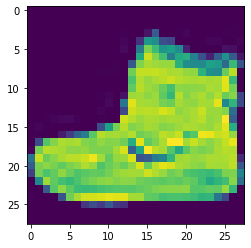

In [8]:
plt.imshow(X_train[0])

In [9]:
X_test = X_test / 255.0

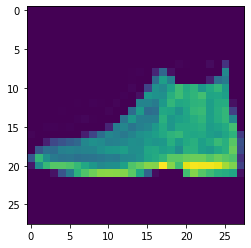

In [10]:
plt.imshow(X_test[0])

In [11]:
y_train[0]

9

### Reshaping of the dataset

Since we are using fully connected network, we reshape the training and testing subsets to be in the vector format. 

In [12]:
#Since each image is 28x28, we simply use reshape the full dataset to [-1 (all elements), height * width]
X_train = X_train.reshape(-1, 28*28)

In [13]:
X_train.shape

(60000, 784)

In [14]:
#Reshape the testing subset in the same way
X_test = X_test.reshape(-1, 28*28)

## Stage 4: Building an Artificial Neural network

### Defining the model

Simply define an object of the Sequential model.

In [15]:
model = tf.keras.models.Sequential()

### Adding the first layer (Dense layer)

Layer hyper-parameters:
- number of units/neurons: 128
- activation function: ReLU
- input_shape: (784, )

In [16]:
model.add(tf.keras.layers.Dense(units=128, activation='relu', input_shape=(784, )))

### Adding a Dropout layer 

Dropout is a Regularization technique where we randomly set neurons in a layer to zero. In this way, while training those neurons won't be updated. Because some percentage of neurons won't be updated the whole training process is long and we have less chance for overfitting.

In [17]:
model.add(tf.keras.layers.Dropout(0.2))

### Adding the second layer (output layer)

- units == number of classes (10 in the case of Fashion MNIST)
- activation = 'softmax'

In [18]:
model.add(tf.keras.layers.Dense(units=10, activation='softmax'))

### Comiling the model

- Optimizer: Adam
- Loss: Sparse softmax (categorical) crossentropy 

In [19]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['sparse_categorical_accuracy'])

In [20]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 128)               100480    
_________________________________________________________________
dropout (Dropout)            (None, 128)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 10)                1290      
Total params: 101,770
Trainable params: 101,770
Non-trainable params: 0
_________________________________________________________________


### Training the model

In [21]:
model.fit(X_train, y_train, epochs=30)

Train on 60000 samples
Epoch 1/30
60000/60000 [==============================] - 6s 93us/sample - loss: 0.5295 - sparse_categorical_accuracy: 0.8120
Epoch 2/30
60000/60000 [==============================] - 4s 73us/sample - loss: 0.4008 - sparse_categorical_accuracy: 0.8551
Epoch 3/30
60000/60000 [==============================] - 5s 75us/sample - loss: 0.3662 - sparse_categorical_accuracy: 0.8661
Epoch 4/30
60000/60000 [==============================] - 4s 73us/sample - loss: 0.3444 - sparse_categorical_accuracy: 0.8737
Epoch 5/30
60000/60000 [==============================] - 4s 73us/sample - loss: 0.3296 - sparse_categorical_accuracy: 0.8786
Epoch 6/30
60000/60000 [==============================] - 4s 74us/sample - loss: 0.3165 - sparse_categorical_accuracy: 0.8842
Epoch 7/30
60000/60000 [==============================] - 4s 73us/sample - loss: 0.3067 - sparse_categorical_accuracy: 0.8858
Epoch 8/30
60000/60000 [==============================] - 4s 75us/sample - loss: 0.2980 - spars

### Model evaluation and prediction

In [23]:
test_loss, test_accuracy = model.evaluate(X_test, y_test)

10000/1 [===============================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================

In [24]:
print("Test accuracy: {}".format(test_accuracy))

Test accuracy: 0.8895999789237976


## Stage 5 : Saving the model

### Saving the architecture (topology) of the network

In [25]:
model_json = model.to_json()
with open("fashion_model.json", "w") as json_file:
    json_file.write(model_json)

### Saving network weights

In [26]:
model.save_weights("fashion_model.h5")